## Variable Notes
<ul>
<li>
<ol>
pclass: A proxy for socio-economic status (SES)
<li>1st = Upper </li>
<li>2nd = Middle </li>
<li>3rd = Lower </li>
</ol>
</li>

<li>age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5</li>

<li>sibsp: The dataset defines family relations in this way...
<ul>
<li>Sibling = brother, sister, stepbrother, stepsister</li>
<li>Spouse = husband, wife (mistresses and fiancés were ignored)</li>
</ul>
</li>

<li>parch: The dataset defines family relations in this way...
<ul>
<li>Parent = mother, father</li>
<li>Child = daughter, son, stepdaughter, stepson</li>
<li>Some children travelled only with a nanny, therefore parch=0 for them.</li>
</ul>
</li>
</ul>

In [22]:
import matplotlib.pyplot as plt
!pip install matplotlib

ModuleNotFoundError: No module named 'abc233'

In [ ]:
!pip install Flask-Bootstrap4

<img src="ressources/image1.png">

<img src="ressources/image2.png">

<img src="ressources/image3.png">

<img src="ressources/image16.png">

<img src="ressources/image17.png">

<img src="ressources/image18.png">

<img src="ressources/image21.png">

<img src="ressources/image4.png">

<img src="ressources/image5.png">

<img src="ressources/image6.png">

<img src="ressources/image7.png">

<img src="ressources/image8.png">

<img src="ressources/image9.png">

<img src="ressources/image10.png">

<img src="ressources/image11.png">

<img src="ressources/image12.png">

<img src="ressources/image13.png">

<img src="ressources/image14.png">

<img src="ressources/image15.png">

In [70]:
# import all librairies needed for this model

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer

In [43]:
# import dataset 
url_test = "datasets/test.csv"
url_train= "datasets/train.csv"

In [44]:
train_df = pd.read_csv(url_train)
test_df =  pd.read_csv(url_test)

# Exploratory Data Analysis

In [45]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [46]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [47]:
# Null values 
display(train_df.isnull().sum())



PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [48]:
display(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

In [49]:
np.round(train_df.isna().sum()/train_df.shape[0],2)

PassengerId    0.00
Survived       0.00
Pclass         0.00
Name           0.00
Sex            0.00
Age            0.20
SibSp          0.00
Parch          0.00
Ticket         0.00
Fare           0.00
Cabin          0.77
Embarked       0.00
dtype: float64

In [50]:
train_df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


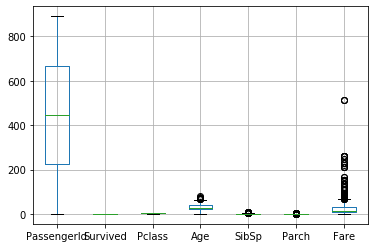

In [51]:
train_df.boxplot()

In [52]:
columns = [x for x in train_df.columns if x not in ['PassengerId','Cabin']]

In [53]:
for col in columns:
    print(col,len(train_df[col].unique()) )

Survived 2
Pclass 3
Name 891
Sex 2
Age 89
SibSp 7
Parch 7
Ticket 681
Fare 248
Embarked 4


In [54]:
train_df[columns].dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Embarked     object
dtype: object

In [55]:
col_cat = ['Survived','Pclass','Sex','SibSp','Parch','Embarked']
for col in col_cat:
    print(col, train_df[col].unique())

Survived [0 1]
Pclass [3 1 2]
Sex ['male' 'female']
SibSp [1 0 3 4 2 5 8]
Parch [0 1 2 5 3 4 6]
Embarked ['S' 'C' 'Q' nan]


In [56]:
map_sex = {'female': 0,'male': 1}
train_df['Sex_num'] = train_df['Sex'].replace(map_sex)

In [57]:
col_cat = ['Survived','Pclass','Sex','SibSp','Parch','Embarked']
for col in col_cat:
    print(col, train_df[col].unique())

Survived [0 1]
Pclass [3 1 2]
Sex ['male' 'female']
SibSp [1 0 3 4 2 5 8]
Parch [0 1 2 5 3 4 6]
Embarked ['S' 'C' 'Q' nan]


In [59]:
map_embarked = {'S': 0,'C': 1, 'Q':3}

In [60]:
train_df['Embarked_Num'] = train_df['Embarked'].replace(map_embarked)

In [62]:
train_df[['Sex_num','Sex']]

,Sex_num,Sex
0,1,male
1,0,female
2,0,female
3,0,female
4,1,male
...,...,...
886,1,male
887,0,female
888,0,female
889,1,male


In [85]:
# SimpleImputer

# Embarked column
simple_1 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
values = simple_1.fit_transform(train_df[['Embarked']].values)
train_df['Embarked'] =  values

In [87]:
train_df['Embarked'].isna().sum()

0